In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Ubah path sesuai dengan lokasi file CSV
data = pd.read_csv("C:\project\data\Walmart_Sales.csv")
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


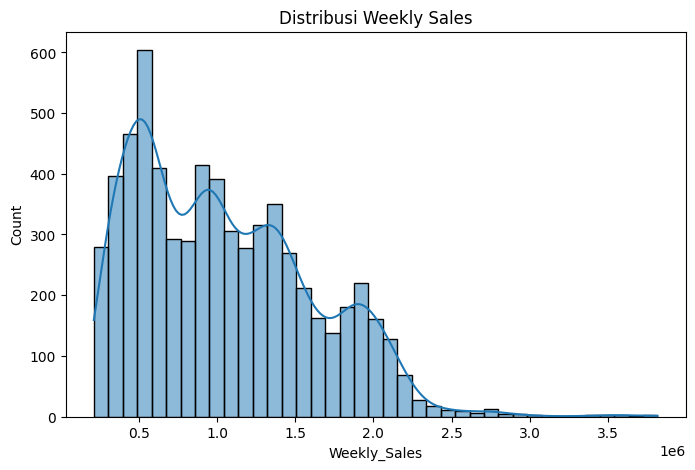

In [3]:
# Informasi umum
data.info()

# Statistik deskriptif
data.describe()

# Cek missing value
data.isnull().sum()

# Visualisasi distribusi penjualan
plt.figure(figsize=(8, 5))
sns.histplot(data['Weekly_Sales'], kde=True)
plt.title('Distribusi Weekly Sales')
plt.show()


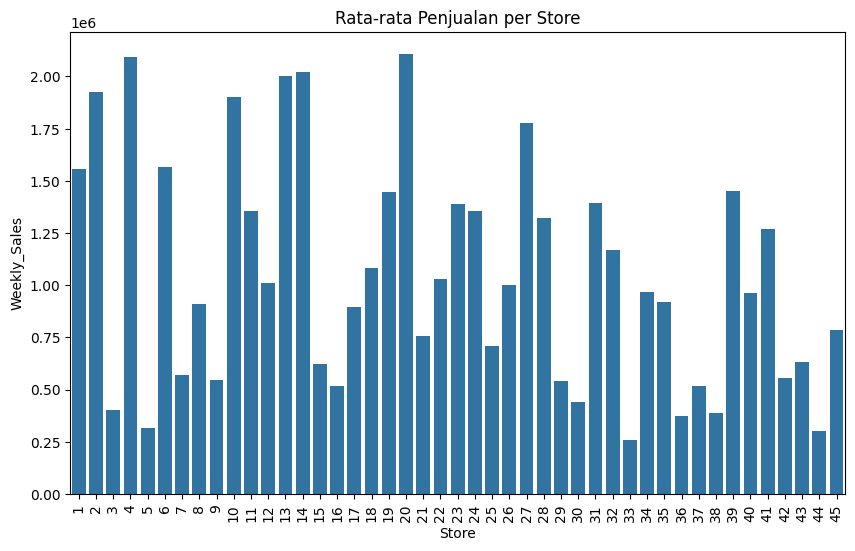

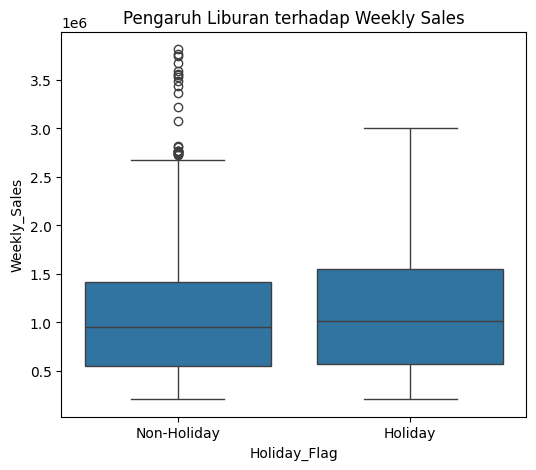

In [4]:
# Rata-rata penjualan per store
plt.figure(figsize=(10, 6))
sns.barplot(data.groupby('Store')['Weekly_Sales'].mean().reset_index(), x='Store', y='Weekly_Sales')
plt.title('Rata-rata Penjualan per Store')
plt.xticks(rotation=90)
plt.show()

# Pengaruh liburan terhadap penjualan
plt.figure(figsize=(6, 5))
sns.boxplot(data=data, x='Holiday_Flag', y='Weekly_Sales')
plt.title('Pengaruh Liburan terhadap Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()


In [ ]:
# Konversi tanggal
data['Date'] = pd.to_datetime(data['tanggal'], dayfirst=True, errors='coerce')

# Feature engineering (misalnya: tahun, bulan)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Pilih fitur dan target
X = data[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Month', 'Year']]
y = data['Weekly_Sales']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'df' is not defined